In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import holidays
import numpy as np
import tensorflow as tf
import joblib


# Remplacez 'chemin/vers/votre/projet/module' par le chemin absolu réel vers le dossier "module" via la commande pwd
module_path = '/Users/eliotsouthon/Desktop/POC/Code/Modules'  
sys.path.append(module_path)
import ma_bibliotheque 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

/Users/eliotsouthon/Desktop/POC/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
csv_file_paths=ma_bibliotheque.path_data('/Users/eliotsouthon/Desktop/POC/Data/Data France/Data_gold_france')
# Affiche la liste des chemins pour vérifier
print("Liste des chemins des fichiers CSV :")
for path in csv_file_paths:
    print(path)

Liste des chemins des fichiers CSV :
/Users/eliotsouthon/Desktop/POC/Data/Data France/Data_gold_france/e_w_250_75.csv


In [3]:
df=pd.read_csv(csv_file_paths[0], sep=';')
print(df.shape,df.head())

(30672, 10)    Consommation brute électricité (MW)  Temperature  Humidity  Wind Force  \
0                               5468.0          8.0      88.0         5.5   
1                               5468.0          8.3      88.0         6.1   
2                               5468.0          8.0      95.0         5.8   
3                               5479.5          6.8      91.5        10.0   
4                               5479.5          9.0      82.0         3.2   

   country_ISO  scale  holiday  day  month  hours  
0          250      5        1    2      1      0  
1          250      5        1    2      1      0  
2          250      5        1    2      1      0  
3          250      5        1    2      1      1  
4          250      5        1    2      1      1  


In [4]:
# Initialiser et ajuster le scaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Sauvegarder le scaler dans un fichier local
joblib.dump(scaler, 'scaler_minmax.pkl')
print("Scaler sauvegardé dans scaler_minmax.pkl")

Scaler sauvegardé dans scaler_minmax.pkl


In [5]:
print(df.shape)
print(df.head())

(30672, 10)
   Consommation brute électricité (MW)  Temperature  Humidity  Wind Force  \
0                               5468.0          8.0      88.0         5.5   
1                               5468.0          8.3      88.0         6.1   
2                               5468.0          8.0      95.0         5.8   
3                               5479.5          6.8      91.5        10.0   
4                               5479.5          9.0      82.0         3.2   

   country_ISO  scale  holiday  day  month  hours  
0          250      5        1    2      1      0  
1          250      5        1    2      1      0  
2          250      5        1    2      1      0  
3          250      5        1    2      1      1  
4          250      5        1    2      1      1  


In [25]:
df.columns

Index(['Consommation brute électricité (MW)', 'Temperature', 'Humidity',
       'Wind Force', 'country_ISO', 'scale', 'holiday', 'day', 'month',
       'hours'],
      dtype='object')

In [6]:
def split_data(data, test_size=0.25):
    """
    splits data to training and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    df_train, df_test = data.iloc[:ntest], data.iloc[ntest:]
    return df_train, df_test

df_train, df_test = split_data(df_normalized, test_size=0.33)

In [7]:
# Il faut que la consommation, le label soit en première position, index 0

x_train_scaled = np.asarray(df_train.iloc[:,1:]) #Selectionne toutes les lignes 
x_test_scaled = np.asarray(df_test.iloc[:,1:])     #et les colonnes a partir de l'index 1
y_train_scaled = np.asarray(df_train.iloc[:,0]) 
y_test_scaled = np.asarray(df_test.iloc[:,0])

In [8]:
print(len(x_train_scaled))
print(len(x_test_scaled))
print(len(y_train_scaled))
print(len(y_test_scaled))

20550
10122
20550
10122


In [9]:
features = df_normalized.columns
features =features[1:]
print(features)

labels=df_normalized.columns
labels=labels[0]
print(labels)

Index(['Temperature', 'Humidity', 'Wind Force', 'country_ISO', 'scale',
       'holiday', 'day', 'month', 'hours'],
      dtype='object')
Consommation brute électricité (MW)


Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Temperature.png


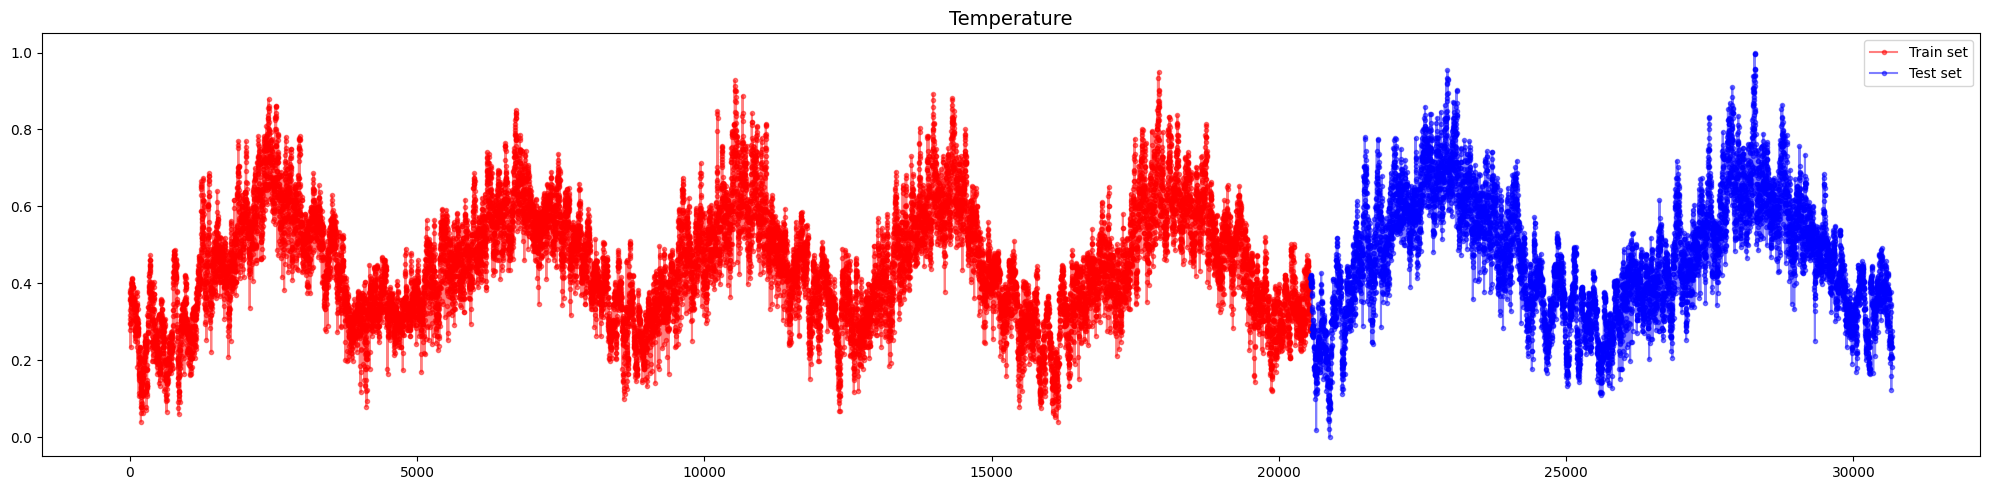

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Humidity.png


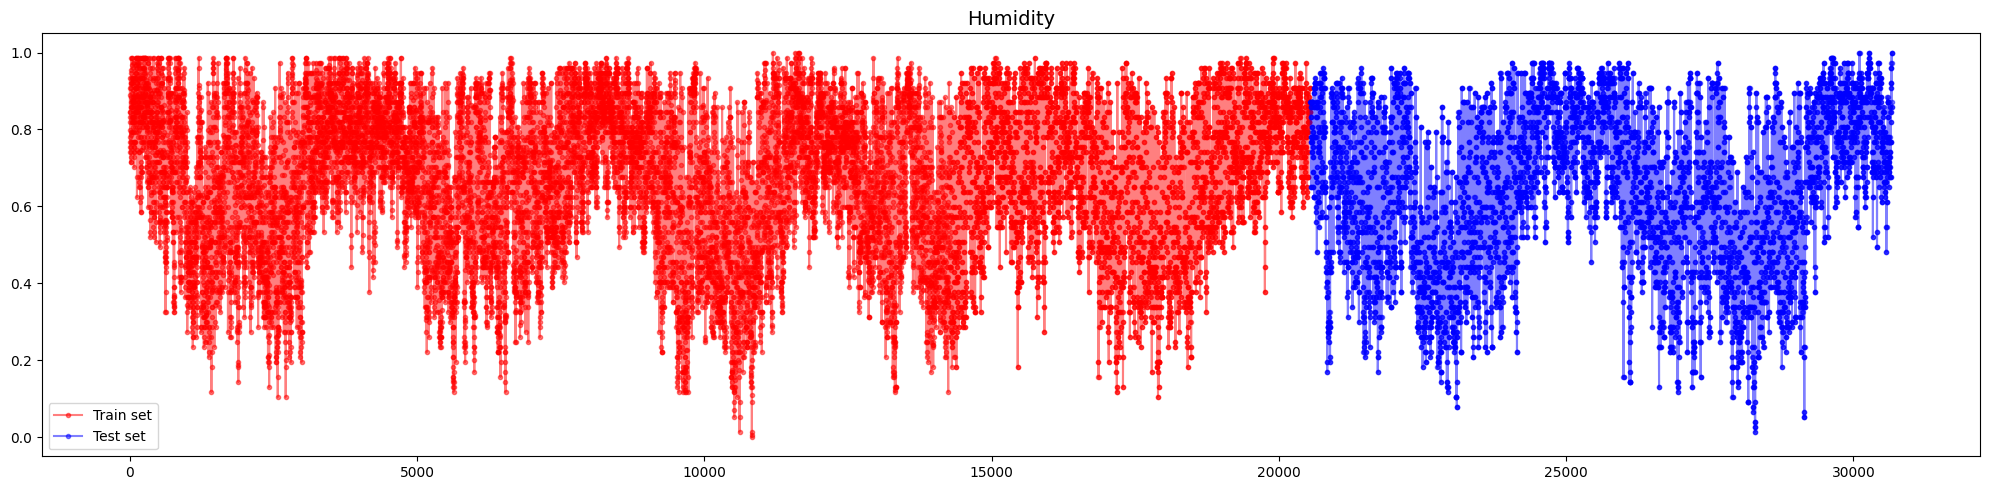

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Wind_Force.png


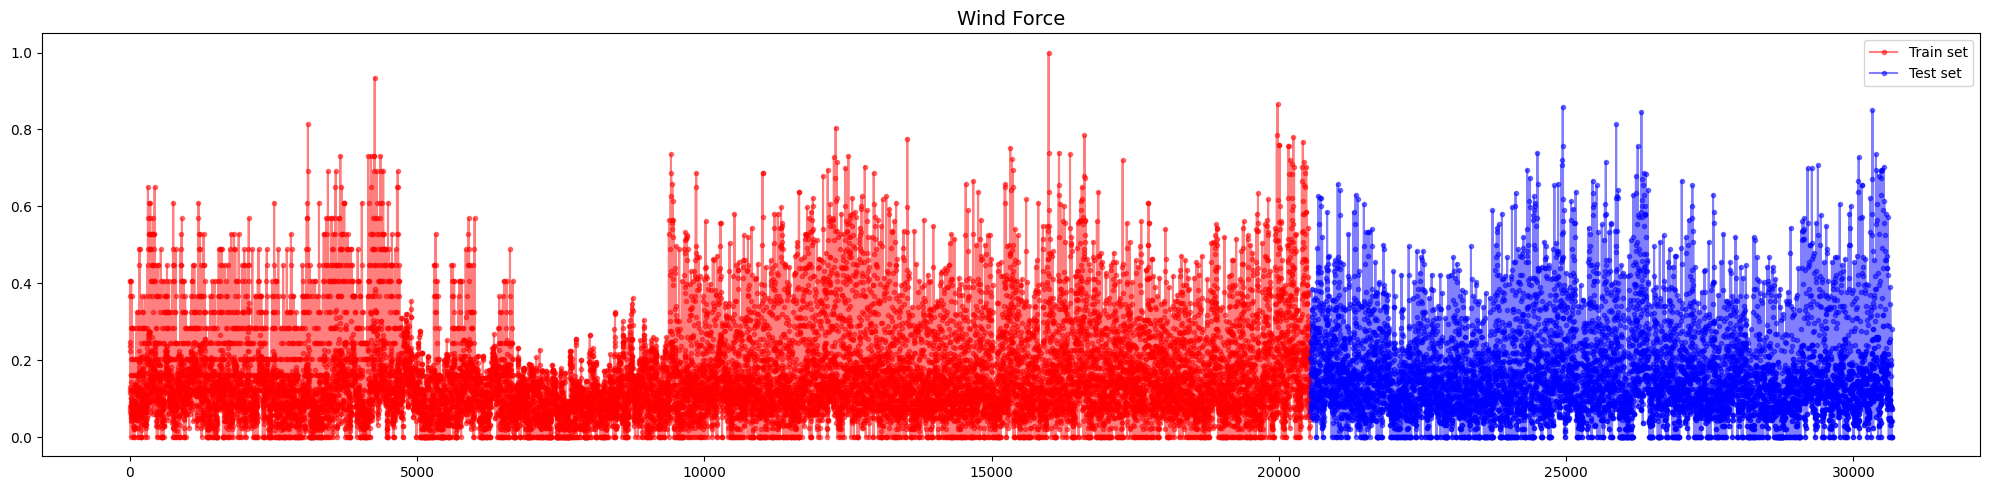

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/country_ISO.png


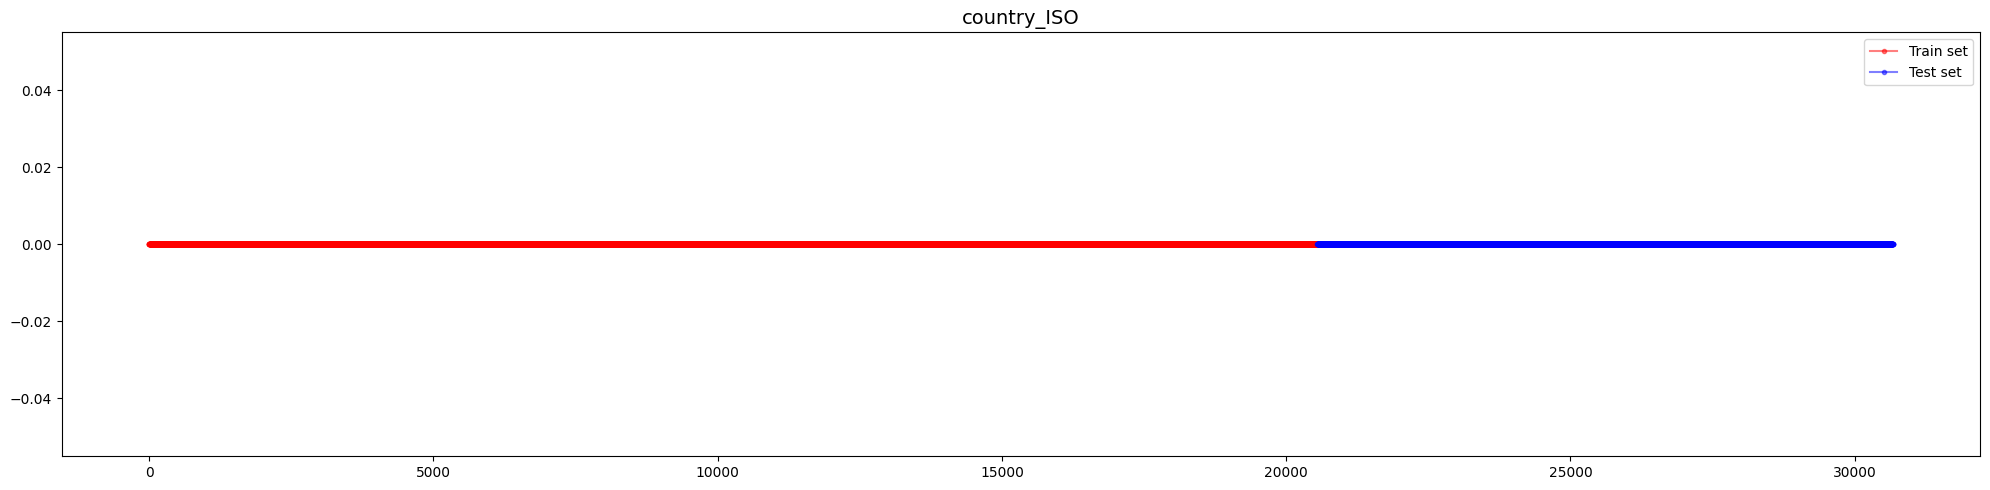

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/scale.png


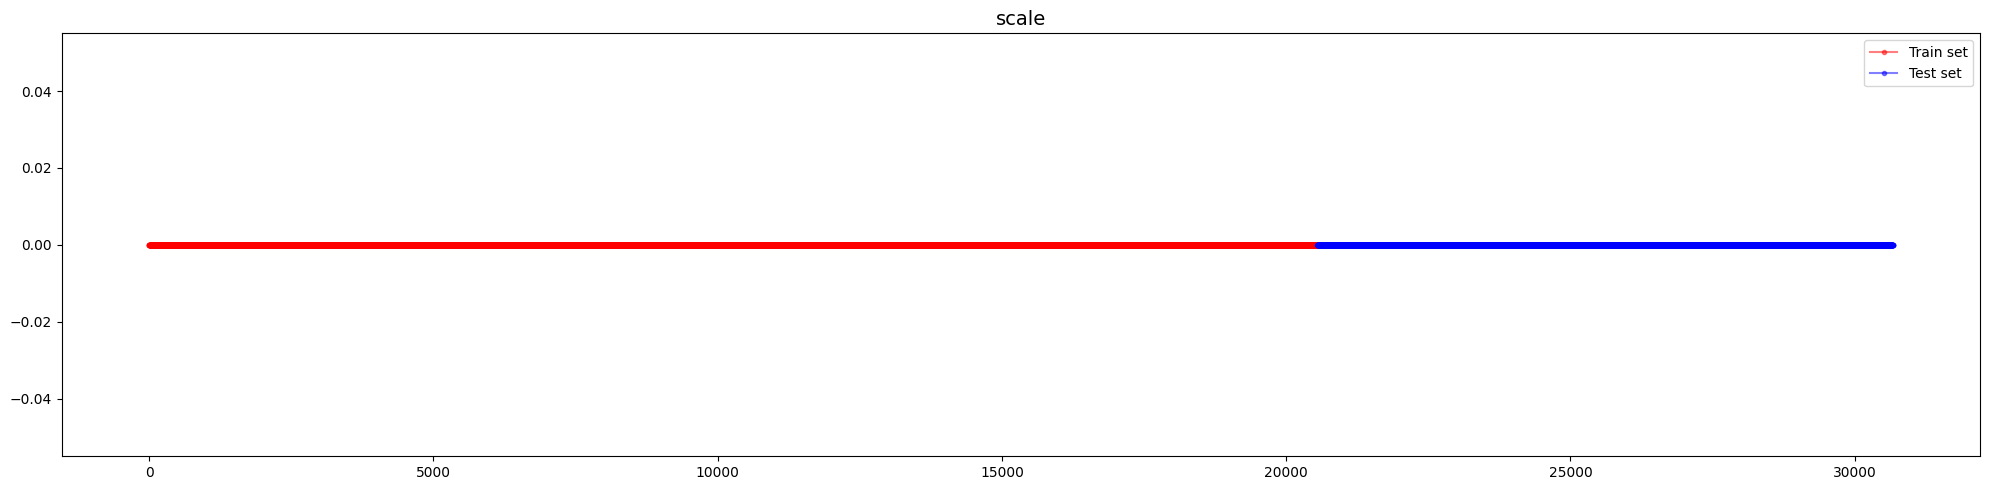

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/holiday.png


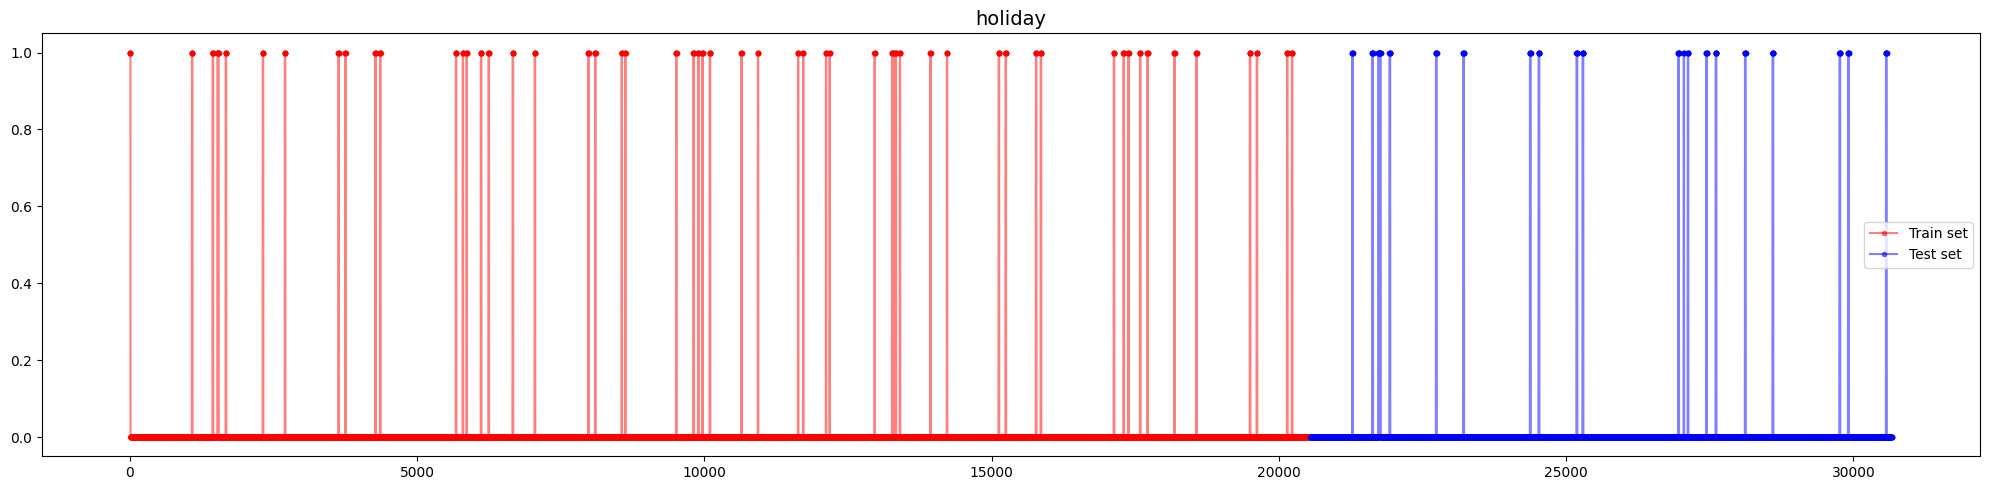

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/day.png


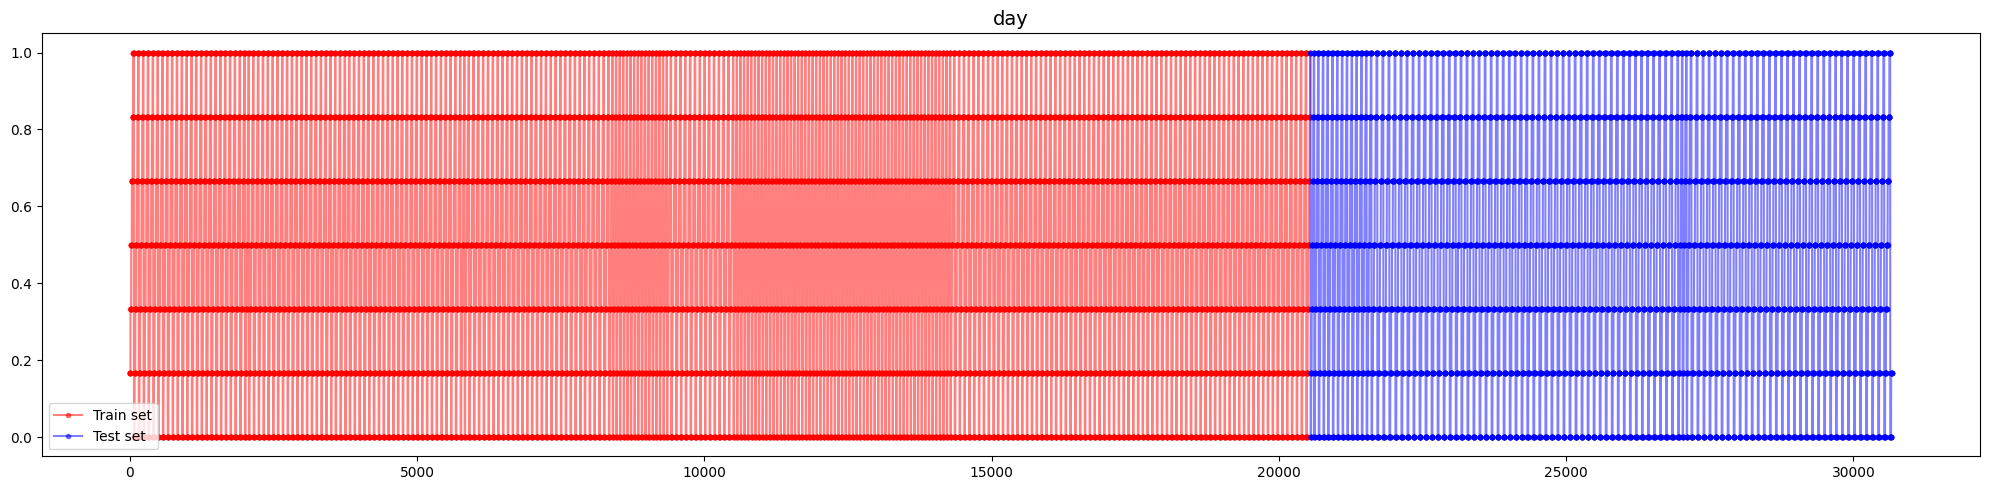

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/month.png


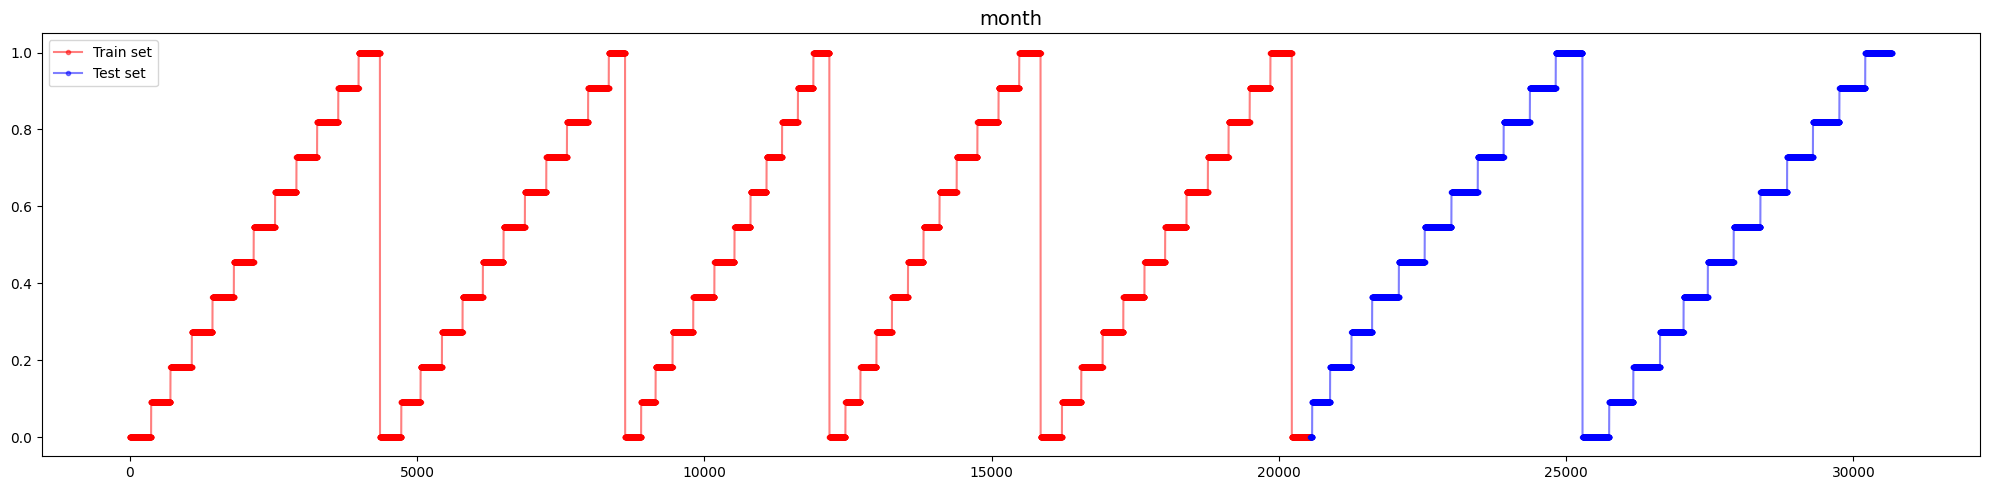

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/hours.png


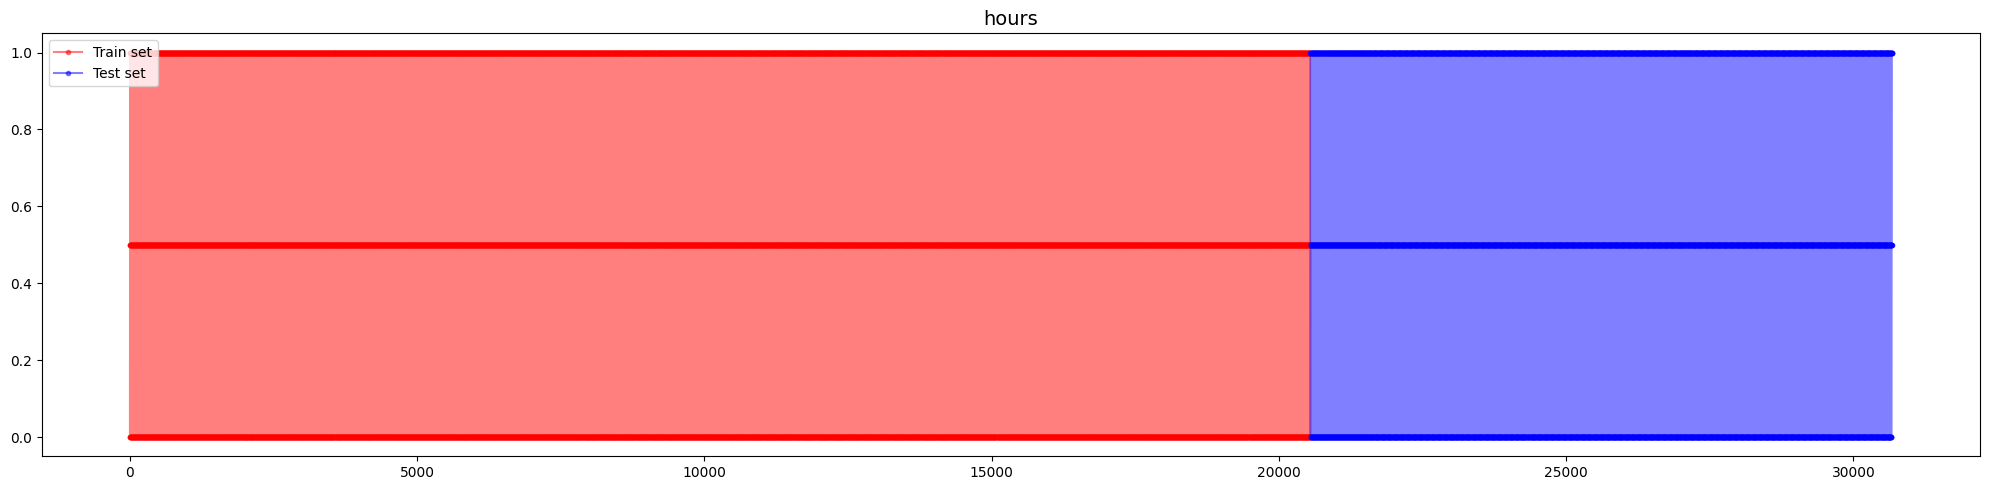

In [10]:
# Créer une liste pour l'abscisse  des graphes  
abs_liste_1=[]
for k in range (len(x_train_scaled)):
    abs_liste_1.append(k)

abs_liste_2=[]
for k in range (len(x_train_scaled),len(x_train_scaled)+len(x_test_scaled)):
    abs_liste_2.append(k)

# Trace les différents features train/test
for i in range(len(features)):
    plt.figure(figsize=(20,5))
    plt.plot(abs_liste_1,x_train_scaled[:,i], '.-', color='red', label='Train set', alpha=0.5)
    plt.plot(abs_liste_2,x_test_scaled[:,i], '.-', color='blue', label='Test set', alpha=0.5)
    plt.legend()
    plt.title(features[i], fontsize=14)
    title = plt.gca().get_title()
    output_dir = "/Users/eliotsouthon/Desktop/POC/Images"
    ma_bibliotheque.save_figure(title, output_dir)
    plt.tight_layout()
    plt.show()


Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Consommation_brute_électricité_(MW).png


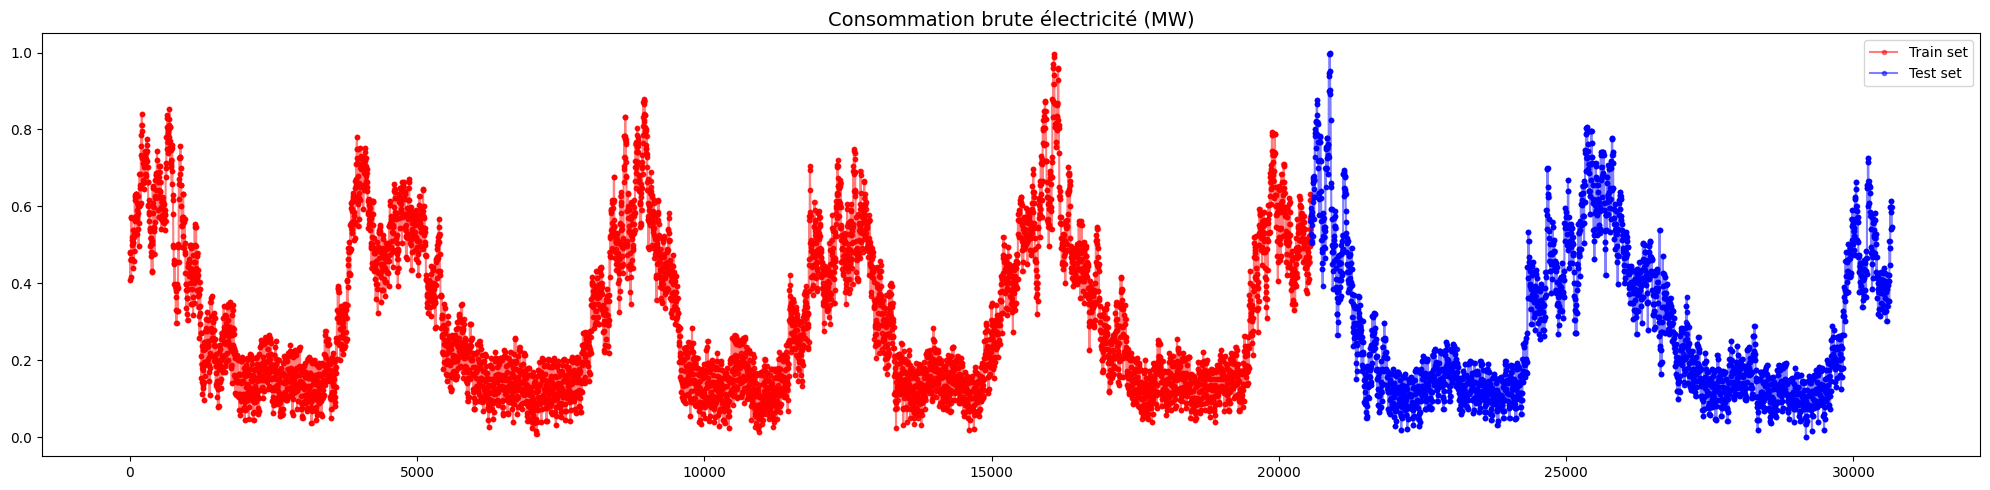

In [11]:
plt.figure(figsize=(20,5))
plt.plot(abs_liste_1,y_train_scaled[:], '.-', color='red', label='Train set', alpha=0.5)
plt.plot(abs_liste_2,y_test_scaled[:], '.-', color='blue', label='Test set', alpha=0.5)
plt.legend()
plt.title(labels, fontsize=14)
plt.tight_layout()
title = plt.gca().get_title()
output_dir = "/Users/eliotsouthon/Desktop/POC/Images"
ma_bibliotheque.save_figure(title, output_dir)
plt.show()

## Model

In [12]:
def batch_generator(batch_size, sequence_length, num_features, num_labels, num_test, x, y):
    """
    Generator function for creating random batches of training-data.
    """

    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_features)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_labels)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
   
        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            if num_test<sequence_length:
                print("there will be a problem test too short", num_test)
            idx = np.random.randint(num_test - 2*sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x[idx:idx+sequence_length]
            y_batch[i] = y[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [13]:
#Vérification de l'utilisation du GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
from tensorflow.keras.utils import Progbar
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [15]:
# Hyperparameters
num_neurons = 100 #150
learning_rate = 0.0005
num_layers = 4 #5
num_iter = 100
keep_prob = 0.2

In [16]:
# Assuming sequence_length, num_features, num_labels, generator, testgenerator are defined

num_features = 9      # Example placeholder value
num_labels = 1         # Example placeholder value

In [17]:
# Build the model

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(168,1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(num_labels))

2024-11-20 15:45:55.568943: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-20 15:45:55.568963: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2024-11-20 15:45:55.568967: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2024-11-20 15:45:55.568984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-20 15:45:55.568995: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/eliotsouthon/Desktop/POC/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using S

In [18]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mean_squared_error')

In [19]:
# Initialize progress bar
progbar = Progbar(num_iter)

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 168, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 168, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,185 (645.25 KB)

 Trainable params: 165,185 (645.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_history=model.fit(x_train_scaled,y_train_scaled,validation_data=(x_test_scaled,y_test_scaled),epochs=25,batch_size=64)

Epoch 1/25


2024-11-20 15:45:56.182524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


322/322 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0501 - val_loss: 0.0312
Epoch 2/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0250 - val_loss: 0.0168
Epoch 3/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0142 - val_loss: 0.0123
Epoch 4/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0127 - val_loss: 0.0114
Epoch 5/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 6/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0118 - val_loss: 0.0154
Epoch 7/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0114 - val_loss: 0.0104
Epoch 8/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 9/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0113 - val_loss: 0.0124
Epoch 10/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0111 - val_loss: 0.0101
Epoch 11/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0111 - val_loss: 0.0098
Epoch 12/25
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/ste

In [22]:
model.save('/Users/eliotsouthon/Desktop/POC/POC/model_save/modele_sauvegarde.h5')

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Train_loss.png


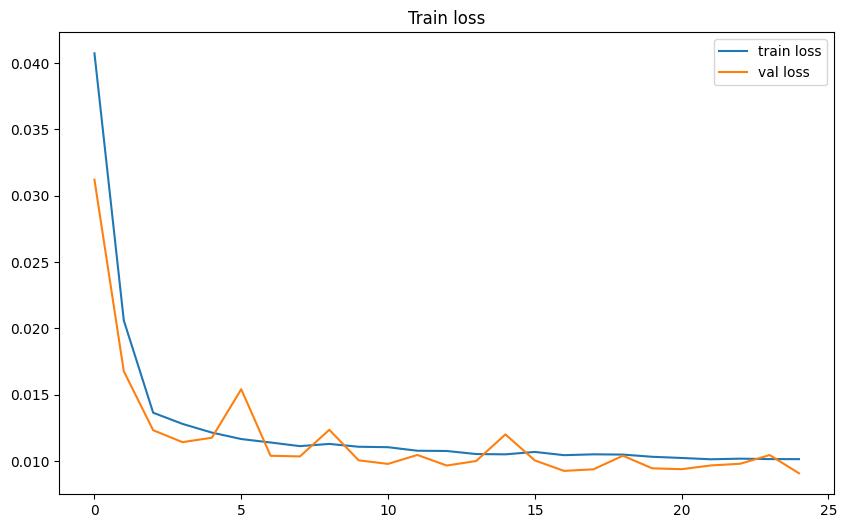

In [23]:
plt.figure(figsize=[10,6])
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title('Train loss')
plt.legend()
title = plt.gca().get_title()
output_dir = "/Users/eliotsouthon/Desktop/POC/Images"
ma_bibliotheque.save_figure(title, output_dir)
plt.show()